In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("Indian Risk Literacy_December 17, 2024.csv")

In [3]:
df0 = df.drop([0,1], axis = 0).reset_index( drop = True )
df0

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q0,Q1,Q2,Q3,Q4,Q5_1,Q6_1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9b_1,Q9b_4,Q9b_5,Q9b_6,Q9b_7,Q9b_8,Q9b_9,Q11a_1,Q11a_2,Q11a_3,Q11b,Q11c,Q11d,Q11h,Attention Check,Q11i,Q12a,Q12b,Q12c,Q13a,Q13b,Q13c,Q13d,Q14a,Q14b,Q14c,Q15a,Q14b.1,response_id,assignment_id,besample_id,completion_code
0,2024-12-16 01:09:33,2024-12-16 01:11:42,IP Address,176.230.124.77,100,129,True,2024-12-16 01:11:42,R_2kBx0Ag55zQSdir,NaN,NaN,NaN,NaN,32.8415,35.0746,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,25,Primary School (up to 10th Std.),Retired,7 (willing to take risk),10 (high investment experience),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),0,0,0,0,0,0,100,2,2,1,DNA test,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,"100 in 10,000 people prior to the intervention...",Vase,None of the above is implied,Less than $102,Do not know,Refuse to answer,123,123,100,59 out of 1000,12,12,Can’t say,"> INR 75,00,000",12,50467,3_121_121,3942,198940914
1,2024-12-16 01:24:54,2024-12-16 01:34:26,IP Address,106.205.186.17,100,572,True,2024-12-16 01:34:27,R_4KpYy7JAC4z6HV0,NaN,NaN,NaN,NaN,26.8756,80.9115,anonymous,EN-GB,0.8999999761581421,"Yes, I would like to participate in the study ...",Female,29,Post-Graduate Program,Student,2,0 (no investment experience),4,5,4,4,4,3,5,4,20,10,10,10,20,10,20,2,1,2,DNA test,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Lamp,The medication increases recovery by 100%,Exactly $102,Do not know,Do not know,500,500,1,9 out of 10,45,20,Crosicol,"< INR 500,000",5000,77766,3_169479821_18190865,3942,306553572
2,2024-12-16 01:26:33,2024-12-16 01:35:27,IP Address,103.136.64.184,100,534,True,2024-12-16 01:35:29,R_4CC095gMspwcTy3,NaN,NaN,NaN,NaN,18.6161,73.7286,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,34,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,7 (willing to take risk),3,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),80,5,0,0,0,10,5,1,1,1,"HIV test,Fingerprint,DNA test,Cancer screening...","The lower the quality of the study, the more l...",It is not possible to predict the growth rate ...,It is not possible to determine which of the a...,Vase,The medication increases recovery by 2%,More than $102,More than today with the money in this account,True,500,10,0.1,59 out of 1000,25,20,They are equal,"< INR 500,000",450000,62864,3_169480327_12165263,3942,247809888
3,2024-12-16 01:26:04,2024-12-16 01:36:23,IP Address,117.214.53.213,100,618,True,2024-12-16 01:36:24,R_4RadSQzbD3kAfEP,NaN,NaN,NaN,NaN,11.6687,92.7494,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,18,Secondary School (11th to 12th Std.),Student,4,7,3,3,3,4,5,4,3,4,25,15,10,10,10,10,20,2,2,2,"HIV test,Professional horoscope","Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,10,0.1,9 out of 10,25,20,They are equal,"INR 1500,001 – INR 30,00,000",10000000,81553,3_169480319_17038057,3942,321481926
4,2024-12-16 01:26:42,2024-12-16 01:37:23,IP Address,106.76.192.188,100,640,True,2024-12-16 01:37:24,R_4MtgGQLhVi3vBAz,NaN,NaN,NaN,NaN,17.3724,78.4378,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,37,Undergraduate P

## Attention Check Screening

In [4]:
dfAttentionFail = df0.loc[ df0["Attention Check"] != "Vase"]
dfAttentionFail

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q0,Q1,Q2,Q3,Q4,Q5_1,Q6_1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9b_1,Q9b_4,Q9b_5,Q9b_6,Q9b_7,Q9b_8,Q9b_9,Q11a_1,Q11a_2,Q11a_3,Q11b,Q11c,Q11d,Q11h,Attention Check,Q11i,Q12a,Q12b,Q12c,Q13a,Q13b,Q13c,Q13d,Q14a,Q14b,Q14c,Q15a,Q14b.1,response_id,assignment_id,besample_id,completion_code
1,2024-12-16 01:24:54,2024-12-16 01:34:26,IP Address,106.205.186.17,100,572,True,2024-12-16 01:34:27,R_4KpYy7JAC4z6HV0,NaN,NaN,NaN,NaN,26.8756,80.9115,anonymous,EN-GB,0.8999999761581421,"Yes, I would like to participate in the study ...",Female,29,Post-Graduate Program,Student,2,0 (no investment experience),4,5,4,4,4,3,5,4,20,10,10,10,20,10,20,2,1,2,DNA test,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Lamp,The medication increases recovery by 100%,Exactly $102,Do not know,Do not know,500,500,1,9 out of 10,45,20,Crosicol,"< INR 500,000",5000,77766,3_169479821_18190865,3942,306553572
4,2024-12-16 01:26:42,2024-12-16 01:37:23,IP Address,106.76.192.188,100,640,True,2024-12-16 01:37:24,R_4MtgGQLhVi3vBAz,NaN,NaN,NaN,NaN,17.3724,78.4378,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,37,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,5,6,5,5,4,5,5,5,5,5,20,20,20,0,10,10,20,2,2,1,Fingerprint,"The higher the quality of the study, the more ...",The growth rate over five years will be exactl...,"100 in 10,000 people prior to the intervention...",Lamp,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,400,10,9 out of 10,50,20,They are equal,"< INR 500,000",400000,46765,3_169479825_5837413,3942,184347630
5,2024-12-16 01:26:21,2024-12-16 01:37:45,IP Address,106.76.198.93,100,683,True,2024-12-16 01:37:46,R_4ixPHAH18ewQzIZ,NaN,NaN,NaN,NaN,17.3724,78.4378,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,62,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,5,5,5,5,5,4,5,4,5,5,20,20,20,0,10,20,10,1,2,2,Fingerprint,"The higher the quality of the study, the more ...",It is not possible to predict the growth rate ...,5 in 100 people prior to the intervention to 6...,Lamp,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,400,600,10,9 out of 59,50,20,They are equal,"< INR 500,000",40000,32051,3_169479823_13715641,3942,126345042
6,2024-12-16 01:27:45,2024-12-16 01:39:14,IP Address,152.58.215.201,100,689,True,2024-12-16 01:39:15,R_4QgDJjAKUfSz6yo,NaN,NaN,NaN,NaN,9.9327,78.1141,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,41,Post-Graduate Program,Venture capital/private equity,7 (willing to take risk),4,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),10,20,10,10,20,10,20,2,2,2,Fingerprint,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Lamp,The medication increases recovery by 2%,More than $102,Less than today with the money in this account,True,500,100,99,59 out of 100,100,40,Crosicol,"< INR 500,000",2,36896,3_169480325_9206385,3942,145444032
8,2024-12-16 01:37:32,2024-12-16 01:44:26,IP Address,103.204.157.52,100,413,True,2024-12-16 01:44:26,R_4xXB9NpV6lOMciv,NaN,NaN,NaN,NaN,10.7831,79.1359,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,25,Post-Graduate Program,Student,1,0 (no investment experience),1 (strongly disagree),1 (strongly disagree),1 (strongly disagree),1 (strongly disagree),1 (strongly disagree),1 (strongly disagree),1 (

In [5]:
attentionFailID = dfAttentionFail["response_id"]
attentionFailID.size

56

In [6]:
df1 = df0.loc[ df0["Attention Check"] == "Vase"].copy()

In [7]:
df1

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q0,Q1,Q2,Q3,Q4,Q5_1,Q6_1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9b_1,Q9b_4,Q9b_5,Q9b_6,Q9b_7,Q9b_8,Q9b_9,Q11a_1,Q11a_2,Q11a_3,Q11b,Q11c,Q11d,Q11h,Attention Check,Q11i,Q12a,Q12b,Q12c,Q13a,Q13b,Q13c,Q13d,Q14a,Q14b,Q14c,Q15a,Q14b.1,response_id,assignment_id,besample_id,completion_code
0,2024-12-16 01:09:33,2024-12-16 01:11:42,IP Address,176.230.124.77,100,129,True,2024-12-16 01:11:42,R_2kBx0Ag55zQSdir,NaN,NaN,NaN,NaN,32.8415,35.0746,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,25,Primary School (up to 10th Std.),Retired,7 (willing to take risk),10 (high investment experience),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),0,0,0,0,0,0,100,2,2,1,DNA test,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,"100 in 10,000 people prior to the intervention...",Vase,None of the above is implied,Less than $102,Do not know,Refuse to answer,123,123,100,59 out of 1000,12,12,Can’t say,"> INR 75,00,000",12,50467,3_121_121,3942,198940914
2,2024-12-16 01:26:33,2024-12-16 01:35:27,IP Address,103.136.64.184,100,534,True,2024-12-16 01:35:29,R_4CC095gMspwcTy3,NaN,NaN,NaN,NaN,18.6161,73.7286,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,34,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,7 (willing to take risk),3,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),80,5,0,0,0,10,5,1,1,1,"HIV test,Fingerprint,DNA test,Cancer screening...","The lower the quality of the study, the more l...",It is not possible to predict the growth rate ...,It is not possible to determine which of the a...,Vase,The medication increases recovery by 2%,More than $102,More than today with the money in this account,True,500,10,0.1,59 out of 1000,25,20,They are equal,"< INR 500,000",450000,62864,3_169480327_12165263,3942,247809888
3,2024-12-16 01:26:04,2024-12-16 01:36:23,IP Address,117.214.53.213,100,618,True,2024-12-16 01:36:24,R_4RadSQzbD3kAfEP,NaN,NaN,NaN,NaN,11.6687,92.7494,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,18,Secondary School (11th to 12th Std.),Student,4,7,3,3,3,4,5,4,3,4,25,15,10,10,10,10,20,2,2,2,"HIV test,Professional horoscope","Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,10,0.1,9 out of 10,25,20,They are equal,"INR 1500,001 – INR 30,00,000",10000000,81553,3_169480319_17038057,3942,321481926
7,2024-12-16 01:26:34,2024-12-16 01:43:40,IP Address,117.96.53.26,100,1026,True,2024-12-16 01:43:41,R_4OZ9nWvGsQsB15f,NaN,NaN,NaN,NaN,26.1206,91.6523,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,19,Secondary School (11th to 12th Std.),Salaried/Employee/Consultant in a sector other...,3,2,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),9,10,74,7,0,0,0,1,1,1,Professional horoscope,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,More than today with the money in this account,False,500,50,0.1,9 out of 59,30,60,Hertinol,"INR 500,001 – INR 15,00,000",250000,90254,3_169480323_12534743,3942,355781268
9,2024-12-16 01:40:31,2024-12-16 01:45:49,I

## Duration based screening

<Axes: >

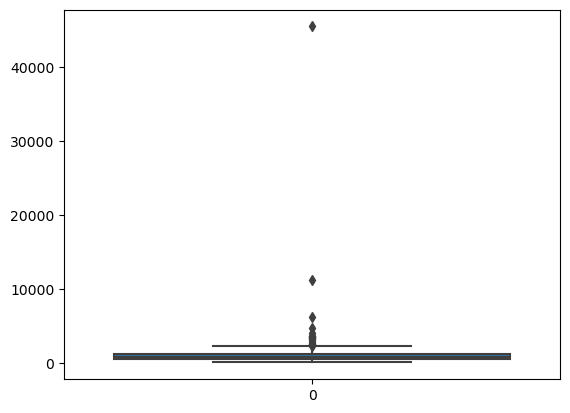

In [8]:
# Dropping outliers
sns.boxplot(data = df1["Duration (in seconds)"])

In [9]:
# Removing outliers = Q1(or Q3) -(or +) 1.5*IQR 

df1["Duration (in seconds)"] = df1["Duration (in seconds)"].astype(np.int64)
[df1_Q1, df1_Q3] = df1["Duration (in seconds)"].quantile([0.25, 0.75])

In [10]:
print( "Q1 = ", df1_Q1, ";", " Q3 = ", df1_Q3)

Q1 =  585.5 ;  Q3 =  1310.5


In [11]:
IQR = df1_Q3 - df1_Q1
df1_outlier_min = df1_Q1 - 1.5*IQR
df1_outlier_max = df1_Q3 + 1.5*IQR
print( "[IN MINUTES] Outliers: > ", df1_outlier_max/60, ";", " Outliers: < ", df1_outlier_min/60)

[IN MINUTES] Outliers: >  39.96666666666667 ;  Outliers: <  -8.366666666666667


C:\Users\SHIVAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


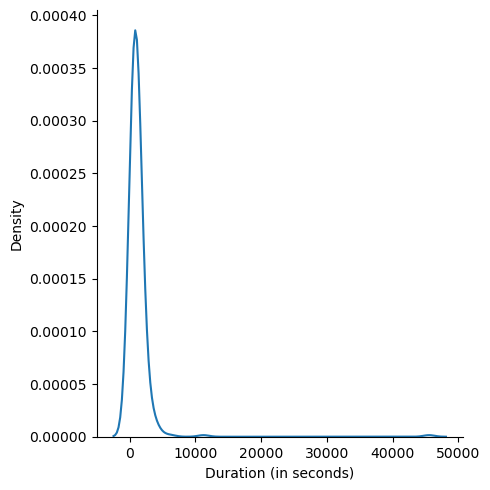

In [12]:
sns.displot( data = df1["Duration (in seconds)"], kind = "kde")

In [43]:
dfDurOutliers = df1.loc[ (df1["Duration (in seconds)"] > df1_outlier_max) | (df1["Duration (in seconds)"] < df1_outlier_min) ]
dfDurOutliers["Duration (in seconds)"].size

19

In [14]:
dfDur = df1.loc[ (df1["Duration (in seconds)"] < df1_outlier_max) & (df1["Duration (in seconds)"] > df1_outlier_min) ]
dfDur

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q0,Q1,Q2,Q3,Q4,Q5_1,Q6_1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9b_1,Q9b_4,Q9b_5,Q9b_6,Q9b_7,Q9b_8,Q9b_9,Q11a_1,Q11a_2,Q11a_3,Q11b,Q11c,Q11d,Q11h,Attention Check,Q11i,Q12a,Q12b,Q12c,Q13a,Q13b,Q13c,Q13d,Q14a,Q14b,Q14c,Q15a,Q14b.1,response_id,assignment_id,besample_id,completion_code
0,2024-12-16 01:09:33,2024-12-16 01:11:42,IP Address,176.230.124.77,100,129,True,2024-12-16 01:11:42,R_2kBx0Ag55zQSdir,NaN,NaN,NaN,NaN,32.8415,35.0746,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,25,Primary School (up to 10th Std.),Retired,7 (willing to take risk),10 (high investment experience),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),0,0,0,0,0,0,100,2,2,1,DNA test,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,"100 in 10,000 people prior to the intervention...",Vase,None of the above is implied,Less than $102,Do not know,Refuse to answer,123,123,100,59 out of 1000,12,12,Can’t say,"> INR 75,00,000",12,50467,3_121_121,3942,198940914
2,2024-12-16 01:26:33,2024-12-16 01:35:27,IP Address,103.136.64.184,100,534,True,2024-12-16 01:35:29,R_4CC095gMspwcTy3,NaN,NaN,NaN,NaN,18.6161,73.7286,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,34,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,7 (willing to take risk),3,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),80,5,0,0,0,10,5,1,1,1,"HIV test,Fingerprint,DNA test,Cancer screening...","The lower the quality of the study, the more l...",It is not possible to predict the growth rate ...,It is not possible to determine which of the a...,Vase,The medication increases recovery by 2%,More than $102,More than today with the money in this account,True,500,10,0.1,59 out of 1000,25,20,They are equal,"< INR 500,000",450000,62864,3_169480327_12165263,3942,247809888
3,2024-12-16 01:26:04,2024-12-16 01:36:23,IP Address,117.214.53.213,100,618,True,2024-12-16 01:36:24,R_4RadSQzbD3kAfEP,NaN,NaN,NaN,NaN,11.6687,92.7494,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,18,Secondary School (11th to 12th Std.),Student,4,7,3,3,3,4,5,4,3,4,25,15,10,10,10,10,20,2,2,2,"HIV test,Professional horoscope","Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,10,0.1,9 out of 10,25,20,They are equal,"INR 1500,001 – INR 30,00,000",10000000,81553,3_169480319_17038057,3942,321481926
7,2024-12-16 01:26:34,2024-12-16 01:43:40,IP Address,117.96.53.26,100,1026,True,2024-12-16 01:43:41,R_4OZ9nWvGsQsB15f,NaN,NaN,NaN,NaN,26.1206,91.6523,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,19,Secondary School (11th to 12th Std.),Salaried/Employee/Consultant in a sector other...,3,2,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),9,10,74,7,0,0,0,1,1,1,Professional horoscope,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,More than today with the money in this account,False,500,50,0.1,9 out of 59,30,60,Hertinol,"INR 500,001 – INR 15,00,000",250000,90254,3_169480323_12534743,3942,355781268
9,2024-12-16 01:40:31,2024-12-16 01:45:49,I

<Axes: >

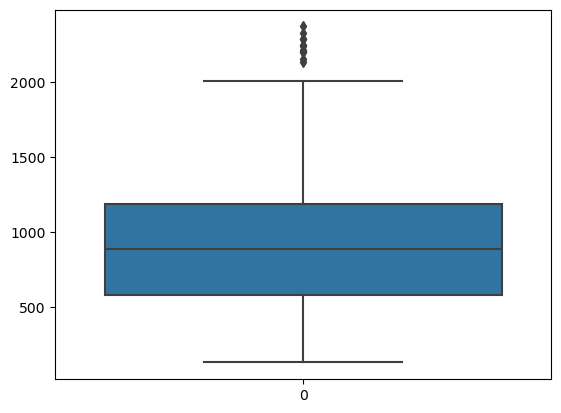

In [15]:
# Dropped Outliers
sns.boxplot(data = dfDur["Duration (in seconds)"])

C:\Users\SHIVAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


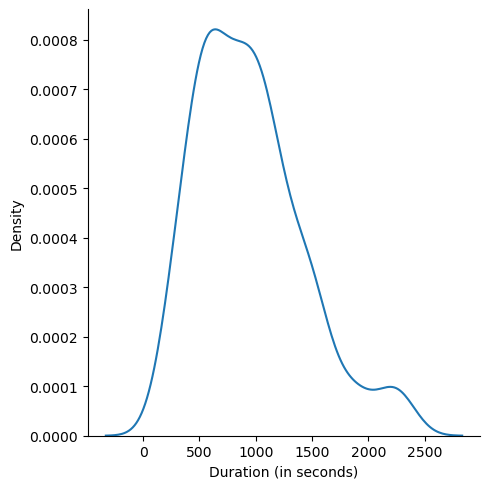

In [16]:
sns.displot( data = dfDur["Duration (in seconds)"], kind = "kde")

In [17]:
[dfDur_Q1, dfDur_Q3] = dfDur["Duration (in seconds)"].quantile([0.25, 0.75])

print( "Q1 = ", dfDur_Q1, ";", " Q3 = ", dfDur_Q3)

IQRDur = dfDur_Q3 - dfDur_Q1
dfDur_outlier_min = dfDur_Q1 - 1.5*IQRDur
dfDur_outlier_max = dfDur_Q3 + 1.5*IQRDur
print( "[IN MINUTES] Outliers: > ", dfDur_outlier_max/60, ";", " Outliers: < ", dfDur_outlier_min/60)

Q1 =  576.75 ;  Q3 =  1187.75
[IN MINUTES] Outliers: >  35.07083333333333 ;  Outliers: <  -5.6625


In [45]:
dfDur2 = dfDur.loc[ (dfDur["Duration (in seconds)"] < dfDur_outlier_max) & (dfDur["Duration (in seconds)"] > dfDur_outlier_min) ]

dfDurOutliers2 = df1.loc[ (df1["Duration (in seconds)"] > dfDur_outlier_max) | (df1["Duration (in seconds)"] < dfDur_outlier_min) ]
dfDurOutliers2["Duration (in seconds)"].size

30

<Axes: >

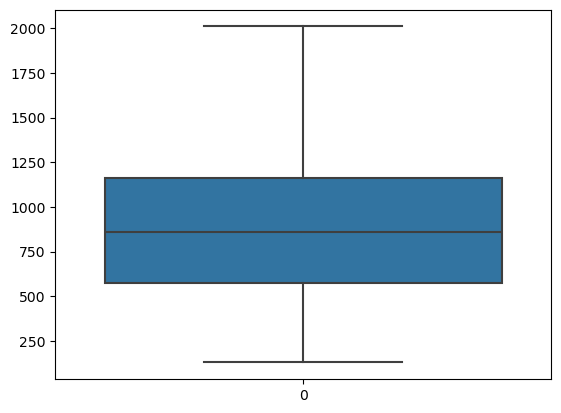

In [19]:
#dropped outliers 2
sns.boxplot(data = dfDur2["Duration (in seconds)"])

C:\Users\SHIVAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


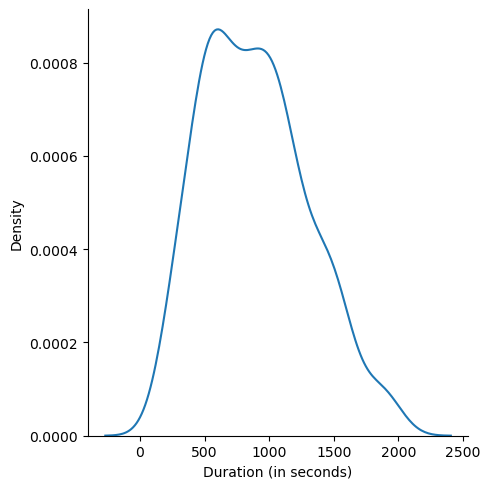

In [20]:
sns.displot( data = dfDur2["Duration (in seconds)"], kind = "kde")

In [21]:
# Unbiased Standard Deviation (Duration is the population) and Mean --> Mean = Median
durStd = dfDur2["Duration (in seconds)"].std()
durMean = dfDur2["Duration (in seconds)"].mean()
durMedian = dfDur2["Duration (in seconds)"].median()
print("(IN MINUTES) Standard Deviation = ", durStd/60, "; Mean = ", durMean/60, "; Median = ", durMedian/60)

(IN MINUTES) Standard Deviation =  6.808171508952839 ; Mean =  14.87164887307236 ; Median =  14.283333333333333


In [22]:
# Mean - 2*Std Dev --> lower/upper 2.5% (not exact) values considered as rejected
durLowThreshold1 = durMean - 2*durStd
durHighThreshold1 = durMean + 2*durStd

print("Lower Threshold: ", durLowThreshold1/60, "minutes; Upper Threshold: ", durHighThreshold1/60, "minutes")

Lower Threshold:  1.2553058551666822 minutes; Upper Threshold:  28.487991890978037 minutes


In [23]:
# Mean - 1*Std Dev --> lower/upper 16% (not exact) values considered as rejected
durLowThreshold2 = durMean - 1*durStd
durHighThreshold2 = durMean + 1*durStd

print("Lower Threshold: ", durLowThreshold2/60, "minutes; Upper Threshold: ", durHighThreshold2/60, "minutes")

Lower Threshold:  8.063477364119521 minutes; Upper Threshold:  21.6798203820252 minutes


In [24]:
# upper/lower 2.5% quantile based rejection
durLowThreshold3 = dfDur2["Duration (in seconds)"].quantile(0.025)
durHighThreshold3 = dfDur2["Duration (in seconds)"].quantile(0.975)

print("Lower Threshold: ", durLowThreshold3/60, "minutes; Upper Threshold: ", durHighThreshold3/60, "minutes")

Lower Threshold:  4.083333333333333 minutes; Upper Threshold:  30.683333333333334 minutes


In [25]:
# Outliers already removed from before
print("No. Outliers removed from before :", df1["Duration (in seconds)"].size - dfDur2["Duration (in seconds)"].size)

No. Outliers removed from before : 30


In [26]:
#Rejected no. of values when using MEAN - 2SD

dfDurFail1 = dfDur.loc[ (dfDur["Duration (in seconds)"] < durLowThreshold1) | (dfDur["Duration (in seconds)"] > durHighThreshold1)]
dfDurFail1["Duration (in seconds)"].size

21

In [27]:
#Rejected no. of values when using MEAN - 1SD

dfDurFail2 = dfDur.loc[ (dfDur["Duration (in seconds)"] < durLowThreshold2) | (dfDur["Duration (in seconds)"] > durHighThreshold2)]
dfDurFail2["Duration (in seconds)"].size

105

In [28]:
#Rejected no. of values when using MEAN - 2SD

dfDurFail3 = dfDur.loc[ (dfDur["Duration (in seconds)"] < durLowThreshold3) | (dfDur["Duration (in seconds)"] > durHighThreshold3)]
dfDurFail3["Duration (in seconds)"].size

25

## Following Not Filtered Yet

In [29]:
dfMale = df1.loc[ df1["Q1"] == "Male" ].reset_index(drop = True)
dfFemale = df1.loc[ df1["Q1"] == "Female" ].reset_index(drop = True)

## MALE Responses

In [30]:
dfMale

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q0,Q1,Q2,Q3,Q4,Q5_1,Q6_1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9b_1,Q9b_4,Q9b_5,Q9b_6,Q9b_7,Q9b_8,Q9b_9,Q11a_1,Q11a_2,Q11a_3,Q11b,Q11c,Q11d,Q11h,Attention Check,Q11i,Q12a,Q12b,Q12c,Q13a,Q13b,Q13c,Q13d,Q14a,Q14b,Q14c,Q15a,Q14b.1,response_id,assignment_id,besample_id,completion_code
0,2024-12-16 01:26:33,2024-12-16 01:35:27,IP Address,103.136.64.184,100,534,True,2024-12-16 01:35:29,R_4CC095gMspwcTy3,NaN,NaN,NaN,NaN,18.6161,73.7286,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,34,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,7 (willing to take risk),3,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),80,5,0,0,0,10,5,1,1,1,"HIV test,Fingerprint,DNA test,Cancer screening...","The lower the quality of the study, the more l...",It is not possible to predict the growth rate ...,It is not possible to determine which of the a...,Vase,The medication increases recovery by 2%,More than $102,More than today with the money in this account,True,500,10,0.1,59 out of 1000,25,20,They are equal,"< INR 500,000",450000,62864,3_169480327_12165263,3942,247809888
1,2024-12-16 01:26:04,2024-12-16 01:36:23,IP Address,117.214.53.213,100,618,True,2024-12-16 01:36:24,R_4RadSQzbD3kAfEP,NaN,NaN,NaN,NaN,11.6687,92.7494,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,18,Secondary School (11th to 12th Std.),Student,4,7,3,3,3,4,5,4,3,4,25,15,10,10,10,10,20,2,2,2,"HIV test,Professional horoscope","Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,10,0.1,9 out of 10,25,20,They are equal,"INR 1500,001 – INR 30,00,000",10000000,81553,3_169480319_17038057,3942,321481926
2,2024-12-16 01:26:34,2024-12-16 01:43:40,IP Address,117.96.53.26,100,1026,True,2024-12-16 01:43:41,R_4OZ9nWvGsQsB15f,NaN,NaN,NaN,NaN,26.1206,91.6523,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,19,Secondary School (11th to 12th Std.),Salaried/Employee/Consultant in a sector other...,3,2,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),9,10,74,7,0,0,0,1,1,1,Professional horoscope,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,More than today with the money in this account,False,500,50,0.1,9 out of 59,30,60,Hertinol,"INR 500,001 – INR 15,00,000",250000,90254,3_169480323_12534743,3942,355781268
3,2024-12-16 01:40:31,2024-12-16 01:45:49,IP Address,152.58.251.191,100,317,True,2024-12-16 01:45:51,R_42P9y5vumxgoqWY,NaN,NaN,NaN,NaN,11.6602,78.1532,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Male,33,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,7 (willing to take risk),10 (high investment experience),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),20,20,10,10,10,20,10,2,2,2,Fingerprint,"The higher the quality of the study, the more ...",The growth rate will be 0.4% on average each year,70 in 100 people prior to the intervention to ...,Vase,The medication increases recovery by 100%,Exactly $102,More than today with the money in this account,True,1000,1,1,9 out of 10,25,60,They are equal,"INR 500,001 – INR 15,00,00

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

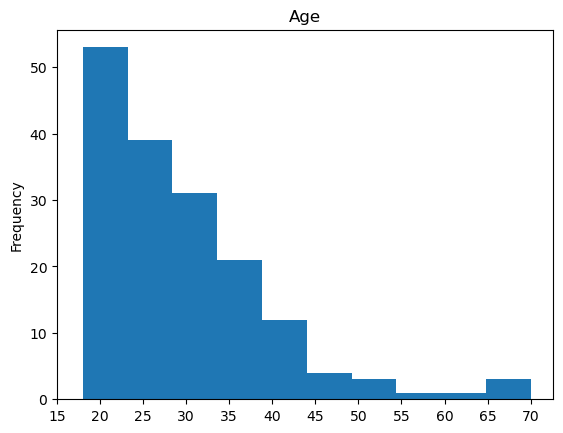

In [31]:
dfMale["Q2"].astype(int).plot(kind = "hist", title = "Age", xticks = np.arange(15, 75, step = 5))

<Axes: title={'center': 'Education'}, xlabel='Q3'>

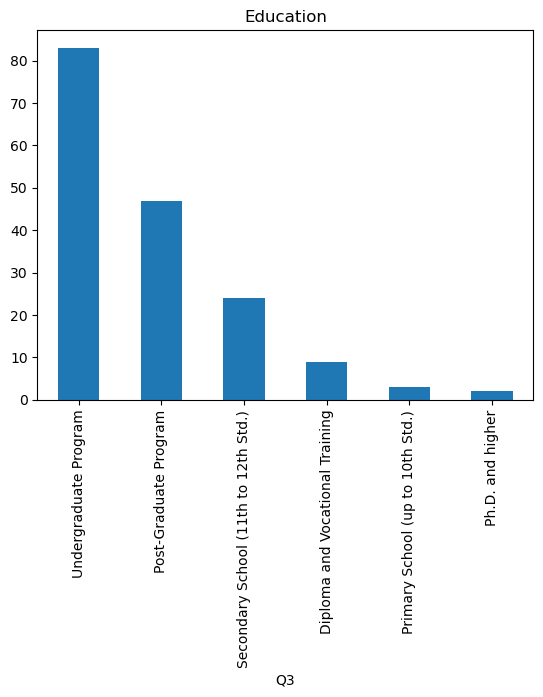

In [32]:
dfMale["Q3"].value_counts().plot(kind = "bar", x = "Q3", title = "Education")

<Axes: title={'center': 'Occupation'}, xlabel='Q4'>

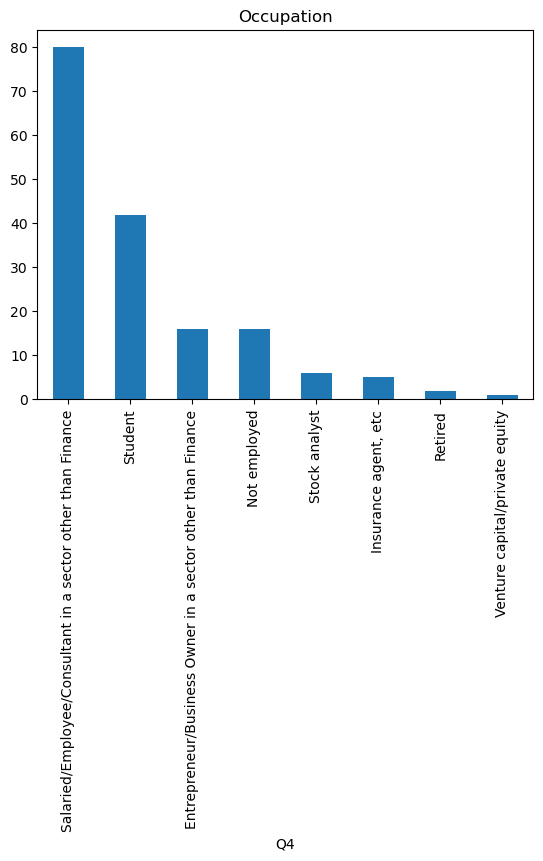

In [33]:
dfMale["Q4"].value_counts().plot(kind = "bar", x = "Q4", title = "Occupation")

<Axes: title={'center': 'Income'}, xlabel='Q15a'>

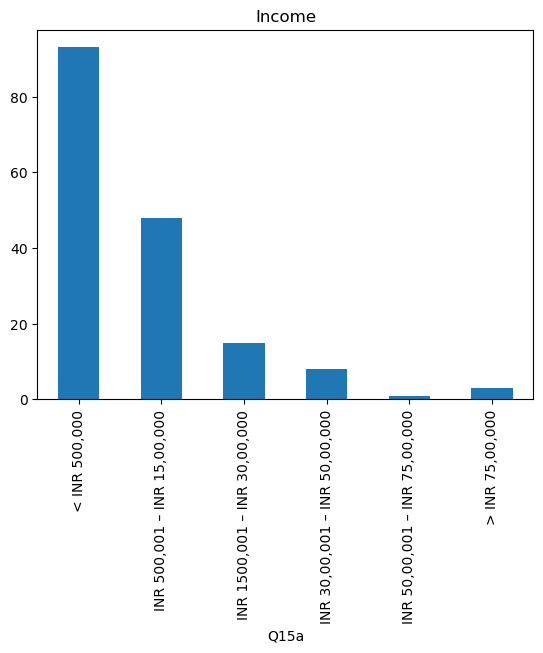

In [34]:
dfMale["Q15a"].value_counts()[["< INR 500,000", "INR 500,001 – INR 15,00,000", "INR 1500,001 – INR 30,00,000",
                                "INR 30,00,001 – INR 50,00,000", "INR 50,00,001 – INR 75,00,000", "> INR 75,00,000"]].plot(kind = "bar", x = "Q15a", title = "Income")

<Axes: title={'center': 'Wealth'}, xlabel='Wealth in crores', ylabel='Frequency'>

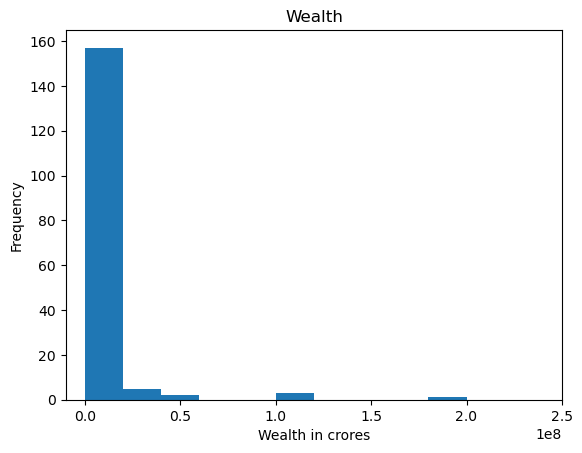

In [35]:
#wealth plot
dfMale["Q14b.1"] = dfMale["Q14b.1"].astype(float)
dfMale["Q14b.1"].plot(kind = "hist", xlabel = "Wealth in crores", xticks = np.arange(0, 300000000, step = 50000000), title = "Wealth")

## FEMALE Responses

In [36]:
dfFemale

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q0,Q1,Q2,Q3,Q4,Q5_1,Q6_1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9b_1,Q9b_4,Q9b_5,Q9b_6,Q9b_7,Q9b_8,Q9b_9,Q11a_1,Q11a_2,Q11a_3,Q11b,Q11c,Q11d,Q11h,Attention Check,Q11i,Q12a,Q12b,Q12c,Q13a,Q13b,Q13c,Q13d,Q14a,Q14b,Q14c,Q15a,Q14b.1,response_id,assignment_id,besample_id,completion_code
0,2024-12-16 01:09:33,2024-12-16 01:11:42,IP Address,176.230.124.77,100,129,True,2024-12-16 01:11:42,R_2kBx0Ag55zQSdir,NaN,NaN,NaN,NaN,32.8415,35.0746,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,25,Primary School (up to 10th Std.),Retired,7 (willing to take risk),10 (high investment experience),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),0,0,0,0,0,0,100,2,2,1,DNA test,"Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,"100 in 10,000 people prior to the intervention...",Vase,None of the above is implied,Less than $102,Do not know,Refuse to answer,123,123,100,59 out of 1000,12,12,Can’t say,"> INR 75,00,000",12,50467,3_121_121,3942,198940914
1,2024-12-16 01:47:42,2024-12-16 01:51:27,IP Address,152.58.251.191,100,225,True,2024-12-16 01:51:28,R_4itiQy9a06AyneV,NaN,NaN,NaN,NaN,11.6602,78.1532,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,50,Undergraduate Program,Not employed,5,6,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),30,10,20,10,10,10,10,2,2,2,Fingerprint,"The higher the quality of the study, the more ...",The growth rate over five years will be exactl...,"100 in 10,000 people prior to the intervention...",Vase,The medication increases recovery by 100%,More than $102,More than today with the money in this account,True,1000,10,1,9 out of 59,25,60,They are equal,"INR 500,001 – INR 15,00,000",1000000,69941,3_169479841_10907943,3942,275707422
2,2024-12-16 01:52:32,2024-12-16 02:00:39,IP Address,49.14.164.189,100,487,True,2024-12-16 02:00:40,R_4C2deHiFGOXeYRv,NaN,NaN,NaN,NaN,23.0276,72.5871,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,23,Undergraduate Program,Student,2,2,5,5,4,1 (strongly disagree),4,4,4,6 (strongly agree),50,25,0,0,0,15,10,1,2,2,Fingerprint,"The higher the quality of the study, the more ...",It is not possible to predict the growth rate ...,5 in 100 people prior to the intervention to 6...,Vase,None of the above is implied,Do not know,Do not know,Do not know,900,900,80,9 out of 10,45,20,They are equal,"< INR 500,000",1000000,58220,3_169479843_18213737,3942,229503240
3,2024-12-16 02:08:35,2024-12-16 02:12:01,IP Address,206.84.231.251,100,206,True,2024-12-16 02:12:02,R_4KBMHc8EBZXwbAc,NaN,NaN,NaN,NaN,20.0024,73.7945,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,39,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,5,7,4,4,5,4,5,5,5,5,30,20,0,0,50,0,0,1,2,2,DNA test,"The higher the quality of the study, the more ...",It is not possible to predict the growth rate ...,70 in 100 people prior to the intervention to ...,Vase,The medication increases recovery by 50%,Less than $102,Less than today with the money in this account,False,100,10,10,59 out of 1000,50,40,They are equal,"INR 30,00,001 – INR 50,00,000",20000,71030,3_169480379_2724963,3942,280000260
4,2024-12-16 02:11:44,2024-12-16 02:15:37,IP Address,103.16.30.169,100,232,True,2024-12-16 02:15:37,R_4CDrxhJ663IsHdY,NaN,NaN,NaN,NaN,28.652,77.1663,anonymous,EN-GB,1,"Yes, I would like to participate in the study ...",Female,25,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,5,7,4,4,6 (strongly agree),5,5,5,4,6 

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

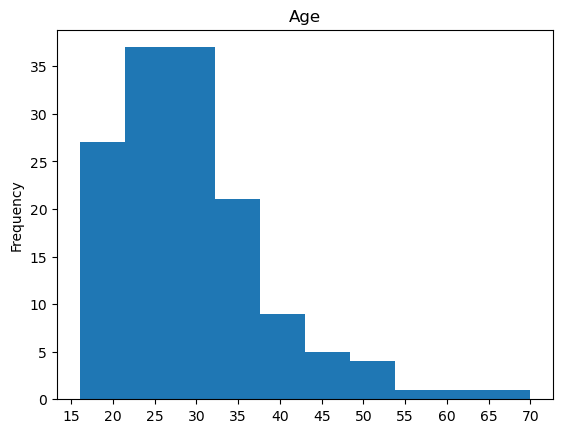

In [37]:
dfFemale["Q2"].astype(int).plot(kind = "hist", title = "Age", xticks = np.arange(15, 75, step = 5))

<Axes: title={'center': 'Education'}, xlabel='Q3'>

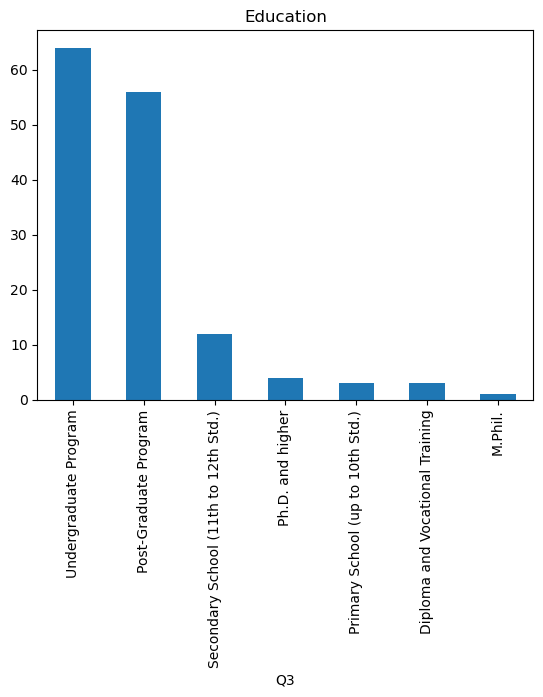

In [38]:
dfFemale["Q3"].value_counts().plot(kind = "bar", x = "Q3", title = "Education")

<Axes: title={'center': 'Occupation'}, xlabel='Q4'>

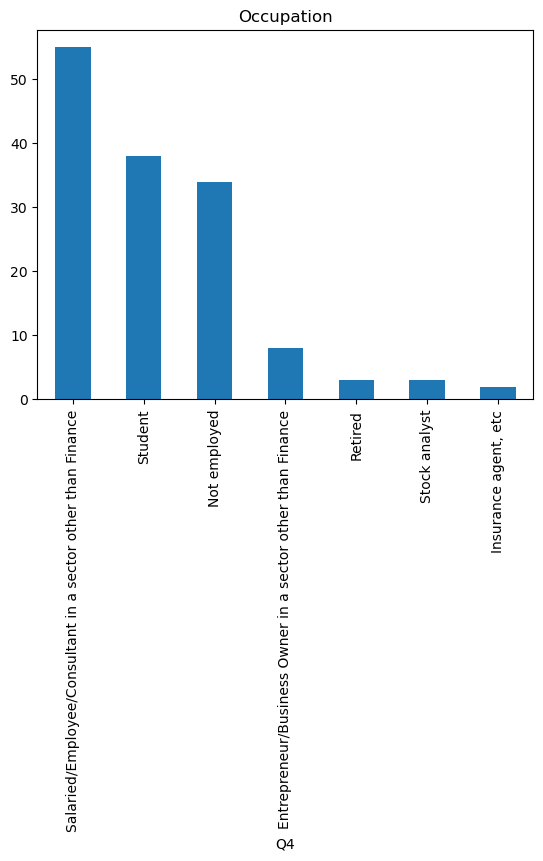

In [39]:
dfFemale["Q4"].value_counts().plot(kind = "bar", x = "Q4", title = "Occupation")

<Axes: title={'center': 'Income'}, xlabel='Q15a'>

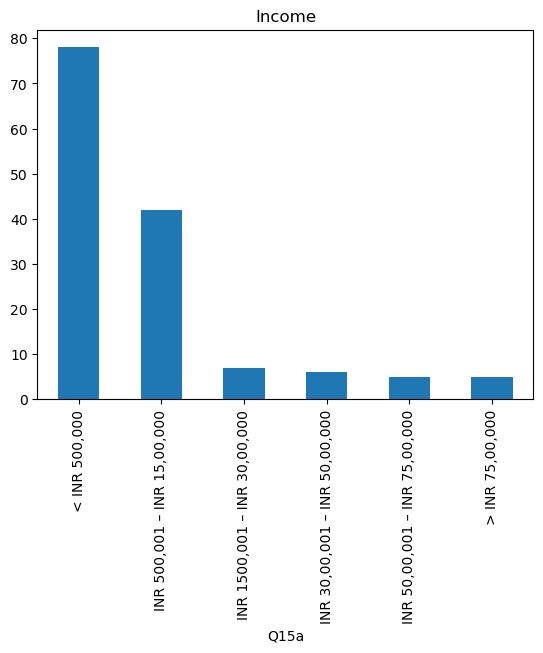

In [40]:
dfFemale["Q15a"].value_counts()[["< INR 500,000", "INR 500,001 – INR 15,00,000", "INR 1500,001 – INR 30,00,000",
                                "INR 30,00,001 – INR 50,00,000", "INR 50,00,001 – INR 75,00,000", "> INR 75,00,000"]].plot(kind = "bar", x = "Q15a", title = "Income")

<Axes: title={'center': 'Wealth'}, xlabel='Wealth in 10 lakhs', ylabel='Frequency'>

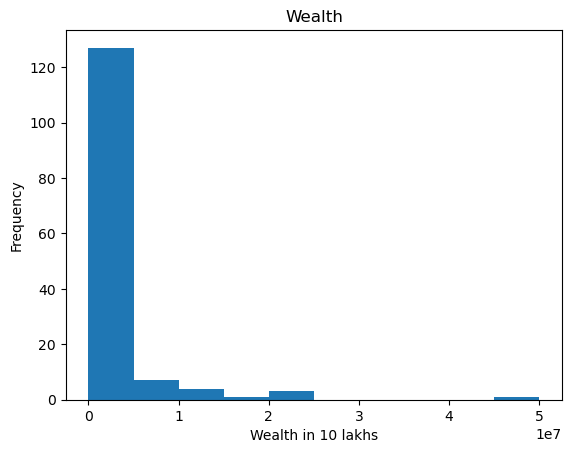

In [41]:
# wealth plot
dfFemale["Q14b.1"] = dfFemale["Q14b.1"].astype(float)
dfFemale["Q14b.1"].plot(kind = "hist", xlabel = "Wealth in 10 lakhs", title = "Wealth")